In [0]:
import tensorflow as tf

if int(tf.__version__[0]) < 2:
  !pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 5.1MB/s 
     |████████████████████████████████| 3.8MB 34.4MB/s 
     |████████████████████████████████| 450kB 31.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


In [0]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


class Autoencoder:
  def __init__(self, D, M):
    # represents a batch of training data
    self.X = tf.placeholder(tf.float32, shape=(None, D))

    # input -> hidden
    self.W = tf.Variable(tf.random_normal(shape=(D, M)) * np.sqrt(2.0 / M))
    self.b = tf.Variable(np.zeros(M).astype(np.float32))

    # hidden -> output
    self.V = tf.Variable(tf.random_normal(shape=(M, D)) * np.sqrt(2.0 / D))
    self.c = tf.Variable(np.zeros(D).astype(np.float32))

    # construct the reconstruction
    self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b)
    logits = tf.matmul(self.Z, self.V) + self.c
    self.X_hat = tf.nn.sigmoid(logits)

    # compute the cost
    self.cost = tf.reduce_sum(
      tf.nn.sigmoid_cross_entropy_with_logits(
        labels=self.X,
        logits=logits
      )
    )

    # make the trainer
    self.train_op = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(self.cost)

    # set up session and variables for later
    self.init_op = tf.global_variables_initializer()
    self.sess = tf.InteractiveSession()
    self.sess.run(self.init_op)

  def fit(self, X, epochs=30, batch_sz=64):
    costs = []
    n_batches = len(X) // batch_sz
    print("n_batches:", n_batches)
    for i in range(epochs):
      print("epoch:", i)
      np.random.shuffle(X)
      for j in range(n_batches):
        batch = X[j*batch_sz:(j+1)*batch_sz]
        _, c, = self.sess.run((self.train_op, self.cost), feed_dict={self.X: batch})
        c /= batch_sz # just debugging
        costs.append(c)
        if j % 100 == 0:
          print("iter: %d, cost: %.3f" % (j, c))
    plt.plot(costs)
    plt.show()

  def predict(self, X):
    return self.sess.run(self.X_hat, feed_dict={self.X: X})


def main():
  (X, Y), (_, _) = mnist.load_data()

  model = Autoencoder(784, 300)
  model.fit(X.reshape(60000, 784) / 255.0)

  # plot reconstruction
  done = False
  while not done:
    i = np.random.choice(len(X))
    x = X[i].reshape(1, 784).squeeze() / 255.0
    im = model.predict([x]).reshape(28, 28)
    plt.subplot(1,2,1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.subplot(1,2,2)
    plt.imshow(im, cmap='gray')
    plt.title("Reconstruction")
    plt.show()

    ans = input("Generate another?")
    if ans and ans[0] in ('n' or 'N'):
      done = True
  return model


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 937
epoch: 0
iter: 0, cost: 565.428
iter: 100, cost: 113.316
iter: 200, cost: 87.179
iter: 300, cost: 75.348
iter: 400, cost: 69.224
iter: 500, cost: 69.032
iter: 600, cost: 67.588
iter: 700, cost: 65.264
iter: 800, cost: 67.764
iter: 900, cost: 66.956
epoch: 1
iter: 0, cost: 61.698
iter: 100, cost: 60.109
iter: 200, cost: 60.808
iter: 300, cost: 57.825
iter: 400, cost: 57.882
iter: 500, cost: 61.321
iter: 600, cost: 57.200
iter: 700, cost: 59.177
iter: 800, cost: 57.086
iter: 900, cost: 53.817
epoch: 2
iter: 0, cost: 58.535
iter: 100, cost: 53.290
iter: 200, cost: 57.104
iter: 300, cost: 57.191
iter: 400, cost: 54.564
iter: 500, cost: 52.702
iter: 600, cost: 54.775
iter: 700, cost: 56.257
iter: 800, cost: 56.690
iter: 900, cost: 56.128
epoch: 3
iter: 0, cost: 54.607
iter: 100, cost: 53.571
iter: 200, cost: 54.839
iter: 300, cost: 55.374
iter: 400, cost: 52.474
iter: 500, cost: 55.778
iter: 600, cost: 53.716
iter: 700, cost: 53.701
iter: 800, cost: 53.617
iter: 900, cost: 55

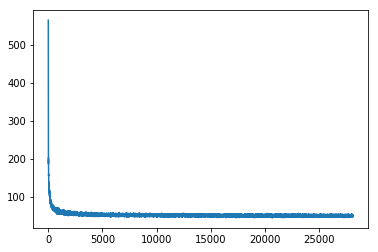

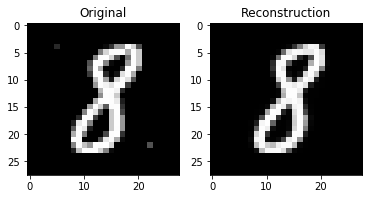

Generate another?n


In [0]:
model = main()

In [0]:
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  W = model.W.eval(sess)
  b = model.b.eval(sess)
  V = model.V.eval(sess)
  c = model.c.eval(sess)
  print("W = ", W, "b = ",  b, "V = ", V, "c = ", c, sep = '\n')

W = 
[[-0.00821265  0.08235127  0.00813885 ...  0.04483488  0.10391492
   0.1379721 ]
 [ 0.06641657 -0.02143224 -0.04862214 ...  0.04220995 -0.02092147
  -0.01297616]
 [ 0.01780958 -0.10981087 -0.02147619 ...  0.1650328   0.12686923
  -0.01883811]
 ...
 [ 0.0402024  -0.08926974  0.03275288 ...  0.129839   -0.03448321
   0.07952582]
 [-0.03136935 -0.06451585 -0.08305546 ... -0.00697923 -0.05451873
  -0.1104797 ]
 [-0.17112386 -0.02046868 -0.04249461 ... -0.06046388  0.0151969
  -0.06821916]]
b = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 